In [ ]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn as sns
from lxml import html
import matplotlib 
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

from collections import Counter
import matplotlib.ticker as ticker
from IPython.core.display import display, HTML

Получаем 250 самых топовых фильмов

In [ ]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [ ]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [ ]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.235336975746515,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156229992018,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98977261048083,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather Part II], ...",8.984112200363233,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951317166310817,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [The Iron Giant], \n, [...",8.00558470116725,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
246,"[\n 247.\n , [Aladdin], \n, [(1992)]...",8.004977362532944,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.004914922523998,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Gandhi], \n, [(1982)],...",8.004048236531052,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [ ]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [ ]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [ ]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [ ]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235336975746515,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156229992018,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98977261048083,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.984112200363233,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951317166310817,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


In [ ]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movies   250 non-null    object
 1   ratings  250 non-null    object
 2   crew     250 non-null    object
 3   links    250 non-null    object
 4   title    250 non-null    object
 5   year     250 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


#### Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 



In [ ]:
crew_list = data["crew"].tolist()

#Создаем список всех имен из крю
crewlist_split = ', '.join(crew_list).split(", ")

#Список всех имён без постфиксов
def correct_list(list):
    return [s.replace(" (dir.)", "") for s in list]

crewlist_corr = correct_list(crewlist_split)
print(len(set(crewlist_corr))) #перепроверка через множеcтво функции ниже

#Создан список уникальных имён. Продублирован список крю, удаляем из него дубликаты.
crewlist_unique = crewlist_corr[:]
for word in list(crewlist_unique):  
    if crewlist_unique.count(word) > 1:
        crewlist_unique.remove(word)


print("Количество участников списка crew:", len(crewlist_corr)) 
print("Количество уникальных имён:", len(crewlist_unique))
print(crewlist_unique[:70])

527
Количество участников списка crew: 750
Количество уникальных имён: 527
['Tim Robbins', 'Heath Ledger', 'Lee J. Cobb', 'Liam Neeson', 'John Travolta', 'Eli Wallach', 'Robin Wright', 'Peter Jackson', 'Elijah Wood', 'Ian McKellen', 'Joseph Gordon-Levitt', 'Irvin Kershner', 'Lana Wachowski', 'Keanu Reeves', 'Laurence Fishburne', 'Ray Liotta', 'Louise Fletcher', 'Morgan Freeman', 'Donna Reed', 'Jonathan Demme', 'Fernando Meirelles', 'Alexandre Rodrigues', 'Leandro Firmino', 'Roberto Benigni', 'Nicoletta Braschi', 'Matthew McConaughey', 'Anne Hathaway', 'Frank Darabont', 'Michael Clarke Duncan', 'George Lucas', 'Robert Zemeckis', 'Michael J. Fox', 'Christopher Lloyd', 'Daveigh Chase', 'Suzanne Pleshette', 'Anthony Perkins', 'Janet Leigh', 'Adrien Brody', 'Thomas Kretschmann', 'Lee Sun-kyun', 'Luc Besson', 'Jean Reno', 'Gary Oldman', 'Roger Allers', 'Matthew Broderick', 'Jeremy Irons', 'Tony Kaye', 'Edward Norton', 'Edward Furlong', 'Bryan Singer', 'Gabriel Byrne', 'Damien Chazelle', 'Mil

#### Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.



In [ ]:
#Создаем список всех директоров
pattern = re.compile(r".*(dir.)")
directors_list = correct_list(list(filter(pattern.match, crewlist_split)))
data["Directors"] = pd.DataFrame(directors_list)

In [ ]:
data.head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.235336975746515,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156229992018,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98977261048083,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan
3,"[\n 4.\n , [The Godfather Part II], ...",8.984112200363233,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951317166310817,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet


In [ ]:
#Считаем какие режиссеры встречались в топе чаще всего:
occurence = data['Directors'].value_counts()[:10]
occurence

Martin Scorsese      7
Akira Kurosawa       7
Christopher Nolan    7
Steven Spielberg     7
Stanley Kubrick      7
Alfred Hitchcock     6
Quentin Tarantino    5
Billy Wilder         5
Charles Chaplin      5
Hayao Miyazaki       4
Name: Directors, dtype: int64

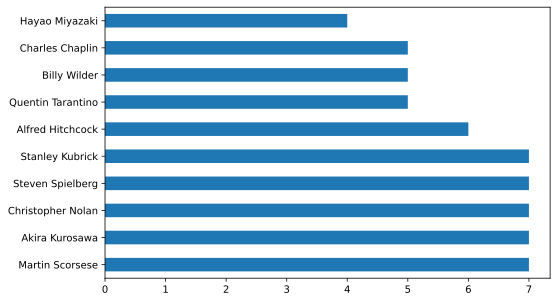

In [ ]:
#Визуализируем результаты:
occurence.plot.barh()
plt.show()

#### Задача 3. 
Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.


In [ ]:
#Создаем список актеров, удаляя всех с постфиксом дир.
pattern = re.compile(r".*(dir.)")
cast = crewlist_split[:]
for line in cast:
    if "(dir.)" in line:
        cast.remove(line)

cast[:10]

['Tim Robbins',
 'Morgan Freeman',
 'Marlon Brando',
 'Al Pacino',
 'Christian Bale',
 'Heath Ledger',
 'Al Pacino',
 'Robert De Niro',
 'Henry Fonda',
 'Lee J. Cobb']

In [ ]:
occurence = Counter(cast)
print("Чаще всего снимались в топовых фильмах:", occurence.most_common(15))

Чаще всего снимались в топовых фильмах: [('Robert De Niro', 9), ('Tom Hanks', 6), ('Harrison Ford', 6), ('Christian Bale', 5), ('Clint Eastwood', 5), ('Leonardo DiCaprio', 5), ('Charles Chaplin', 5), ('Al Pacino', 4), ('Brad Pitt', 4), ('Toshirô Mifune', 4), ('James Stewart', 4), ('Matt Damon', 4), ('Marlon Brando', 3), ('Henry Fonda', 3), ('Elijah Wood', 3)]


#### Задача 4. 
Построить распределение топовых фильмов по годам



Text(0.5, 0, 'Года с 1921 по 2022')

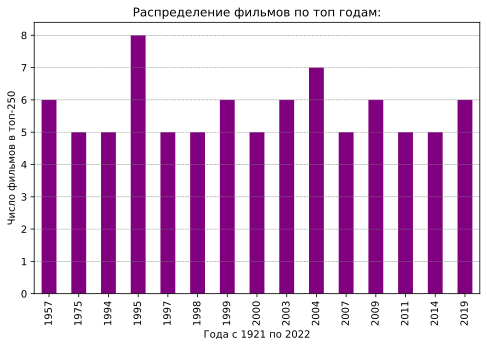

In [ ]:
#Считаем распределение фильмов топа по годам
topplt = data.year.value_counts()[0:15].sort_index().plot(kind="bar", color = 'purple', title="Распределение фильмов по топ годам:")
topplt.grid(axis = "y", color = 'grey', linewidth = 0.5, linestyle = '--') #улучшила визуализацию сетки
topplt.set_ylabel('Число фильмов в топ-250')
miny = data.year.min()
maxy = data.year.max()
topplt.set_xlabel(f"Года с {miny} по {maxy}")


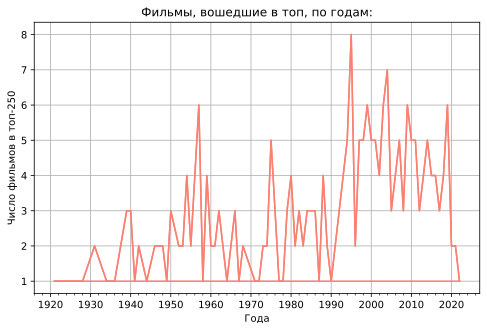

In [ ]:
#Группируем данные по годам и визуализируем:
data["year"] = data["year"].astype(int)
plt = data[['year', "title"]].groupby('year').describe().plot(color="salmon", title="Фильмы, вошедшие в топ, по годам:")
plt.axis()
plt.get_legend().remove()  #убрала окошко с описанием
plt.set_ylabel('Число фильмов в топ-250') #проименовала оси
plt.set_xlabel('Года')
plt.xaxis.set_major_locator(ticker.MultipleLocator(10)) #поставила интервал делений на оси Х: 10 лет 
plt.xaxis.set_minor_locator(ticker.MultipleLocator(2)) #добавила ещё тики (каждые 2 года) между делениями.
plt.grid()

#### Задача 5. 
Построить распределение топовых фильмов по рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать


In [ ]:
#ratings - 250 - non-null - object. => Меняем тип данных для обработки
data["ratings"] = data["ratings"].astype(float)
data["ratings"].describe()

count    250.000000
mean       8.253847
std        0.232316
min        8.002181
25%        8.075964
50%        8.200154
75%        8.360711
max        9.235337
Name: ratings, dtype: float64

In [ ]:
#Делаем срез таблицы и округляем до сотых
film_rating = data[["ratings", "title"]][:10]
film_rating.reset_index(drop=True , inplace=True)
film_rating["ratings"] = film_rating.ratings.round(2)
film_rating.head()

,ratings,title
0,9.24,The Shawshank Redemption
1,9.16,The Godfather
2,8.99,The Dark Knight
3,8.98,The Godfather Part II
4,8.95,12 Angry Men


[Text(0.5, 1.0, 'Топ фильмов по их рейтингу(округлен до сотых)')]

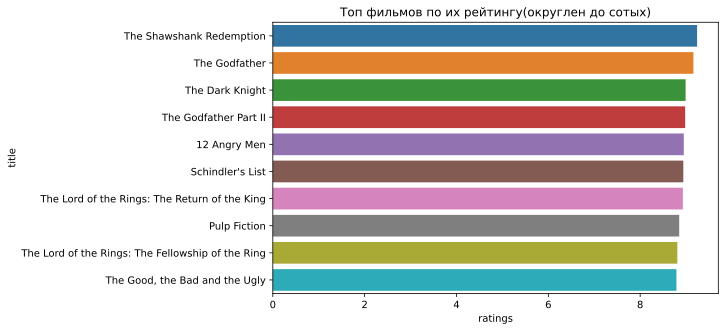

In [ ]:
#Визуализируем с округлением до сотых
sns.barplot(x="ratings", y ="title", data=film_rating).set(title='Топ фильмов по их рейтингу(округлен до сотых)')

In [ ]:
#Округляем данные до десятых
film_rating["ratings"] = film_rating.ratings.round(1)
film_rating.head()

,ratings,title
0,9.2,The Shawshank Redemption
1,9.2,The Godfather
2,9.0,The Dark Knight
3,9.0,The Godfather Part II
4,9.0,12 Angry Men


[Text(0.5, 1.0, 'Топ фильмов по их рейтингу(округлен до десятых)')]

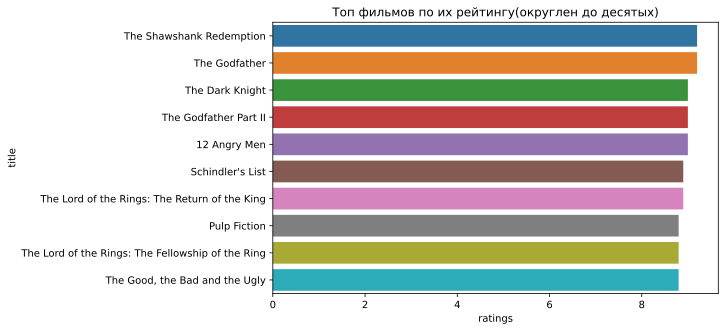

In [ ]:
#Визуализируем с округлением до десятых
sns.barplot(x="ratings", y ="title", data=film_rating).set(title='Топ фильмов по их рейтингу(округлен до десятых)')

In [ ]:
#Округляем данные до целых
film_rating["ratings"] = film_rating.ratings.round()
film_rating.head()

,ratings,title
0,9.0,The Shawshank Redemption
1,9.0,The Godfather
2,9.0,The Dark Knight
3,9.0,The Godfather Part II
4,9.0,12 Angry Men


[Text(0.5, 1.0, 'Топ фильмов по их рейтингу(округлен до целых чисел)')]

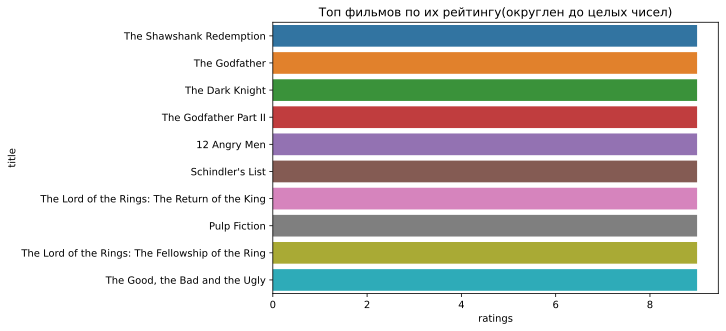

In [ ]:
#Визуализируем
sns.barplot(x="ratings", y ="title", data=film_rating).set(title='Топ фильмов по их рейтингу(округлен до целых чисел)')


#### Задача 6. 
Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.


In [ ]:
film_url = 'http://www.imdb.com/title/tt0068646/'
html_text = requests.get(film_url, headers={'User-Agent': 'Mozilla/5.0'}).text
response.status_code

200

In [ ]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

'The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.'

In [ ]:
def get_description(dtf, links_column):
  descriptions = []
  for link in links_column:
    film_url = f'http://www.imdb.com/{link}'
    html_text = requests.get(film_url, headers={'User-Agent': 'Mozilla/5.0'}).text
    soup = BeautifulSoup(html_text, 'lxml')
    description = soup.find_all(attrs={"name": "description"})[0].get("content")
    descriptions.append(description)
  dtf['description'] = descriptions

In [ ]:
get_description(data, data.links)


In [ ]:
data.iloc[0:8, 4:8]

,title,year,Directors,description
0,The Shawshank Redemption,1994,Frank Darabont,The Shawshank Redemption: Directed by Frank Da...
1,The Godfather,1972,Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...
2,The Dark Knight,2008,Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...
3,The Godfather Part II,1974,Francis Ford Coppola,The Godfather Part II: Directed by Francis For...
4,12 Angry Men,1957,Sidney Lumet,12 Angry Men: Directed by Sidney Lumet. With M...
5,Schindler's List,1993,Steven Spielberg,Schindler's List: Directed by Steven Spielberg...
6,The Lord of the Rings: The Return of the King,2003,Peter Jackson,The Lord of the Rings: The Return of the King:...
7,Pulp Fiction,1994,Quentin Tarantino,Pulp Fiction: Directed by Quentin Tarantino. W...


#### Задача 7. 
С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 

In [ ]:
data["description"][0]

'The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'

In [ ]:
#Ищем имена актеров
def cast_find(text):
  cast = re.findall('(?<=With)(.+?[a-z])\.', text)
  return cast[0]


data["cast"] = data["description"].apply(cast_find)


In [ ]:
#Проверяем как работает функция
data.iloc[0:8, 4:9]

,title,year,Directors,description,cast
0,The Shawshank Redemption,1994,Frank Darabont,The Shawshank Redemption: Directed by Frank Da...,"Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,The Godfather,1972,Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...,"Marlon Brando, Al Pacino, James Caan, Richard..."
2,The Dark Knight,2008,Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...,"Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,The Godfather Part II,1974,Francis Ford Coppola,The Godfather Part II: Directed by Francis For...,"Al Pacino, Robert Duvall, Diane Keaton, Rober..."
4,12 Angry Men,1957,Sidney Lumet,12 Angry Men: Directed by Sidney Lumet. With M...,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G..."
5,Schindler's List,1993,Steven Spielberg,Schindler's List: Directed by Steven Spielberg...,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Car..."
6,The Lord of the Rings: The Return of the King,2003,Peter Jackson,The Lord of the Rings: The Return of the King:...,"Noel Appleby, Ali Astin, Sean Astin, David Aston"
7,Pulp Fiction,1994,Quentin Tarantino,Pulp Fiction: Directed by Quentin Tarantino. W...,"Tim Roth, Amanda Plummer, Laura Lovelace, Joh..."


In [ ]:
#Считаем пустые строки
data.cast.isnull().sum()

0

#### Задача 8. 
Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


In [ ]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
rating_votes = soup.find_all(attrs={'class': 'ratingColumn imdbRating'})

In [ ]:
rating_votes[0]

<td class="ratingColumn imdbRating">
<strong title="9.2 based on 2,675,425 user ratings">9.2</strong>
</td>

In [ ]:
#Создаем список из количества проголосовавших, преобразуя его в числа и убирав лишнее.
votes = []
for tags in rating_votes:
  line = tags.find("strong").get("title")
  digits = re.findall(r"(?<=on) (.*) (?=user)", line)
  votes.append(int(digits[0].strip().replace(",", "")))

line

'8.0 based on 34,843 user ratings'

In [ ]:
#Сохраняем данные в таблице 
data["votes"] = votes

In [ ]:
#Сортируем по числу проголосовавших
sorted_votes = data.sort_values(by=['votes'], ascending=False)
sorted_votes.iloc[0:12, 4:12]

,title,year,Directors,description,cast,votes
0,The Shawshank Redemption,1994,Frank Darabont,The Shawshank Redemption: Directed by Frank Da...,"Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2675425
2,The Dark Knight,2008,Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...,"Christian Bale, Heath Ledger, Aaron Eckhart, ...",2648600
13,Inception,2010,Christopher Nolan,Inception: Directed by Christopher Nolan. With...,"Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",2348053
11,Fight Club,1999,David Fincher,Fight Club: Directed by David Fincher. With Ed...,"Edward Norton, Brad Pitt, Meat Loaf, Zach Gre...",2120945
10,Forrest Gump,1994,Robert Zemeckis,Forrest Gump: Directed by Robert Zemeckis. Wit...,"Tom Hanks, Rebecca Williams, Sally Field, Mic...",2075167
7,Pulp Fiction,1994,Quentin Tarantino,Pulp Fiction: Directed by Quentin Tarantino. W...,"Tim Roth, Amanda Plummer, Laura Lovelace, Joh...",2050705
15,The Matrix,1999,Lana Wachowski,"The Matrix: Directed by Lana Wachowski, Lilly ...","Keanu Reeves, Laurence Fishburne, Carrie-Anne...",1910778
8,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,The Lord of the Rings: The Fellowship of the R...,"Alan Howard, Noel Appleby, Sean Astin, Sala B...",1872991
1,The Godfather,1972,Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...,"Marlon Brando, Al Pacino, James Caan, Richard...",1854463
6,The Lord of the Rings: The Return of the King,2003,Peter Jackson,The Lord of the Rings: The Return of the King:...,"Noel Appleby, Ali Astin, Sean Astin, David Aston",1843696


#### Задача 9. 
Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import os, json
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopword = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#создаем функцию, с помощью которой нормализуем текст, убирая служебные слова, цифры, провели лемматизацию.
def lemmatizing(words):
  a = []
  tokens = word_tokenize(words)
  for token in tokens:
      lemmas = lemmatizer.lemmatize(token).lower()
      if lemmas not in stopword and lemmas != " " \
       and lemmas.strip() not in punctuation \
       and len(lemmas) > 2 \
       and token.isdigit() == False:
        a.append(lemmas)
  return a

print(data['title'][0])
print(lemmatizing(data['title'][0]))

print(data["description"][0])
print(lemmatizing(data['description'][0]))
   

The Shawshank Redemption
['shawshank', 'redemption']
The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.
['shawshank', 'redemption', 'directed', 'frank', 'darabont', 'tim', 'robbins', 'morgan', 'freeman', 'bob', 'gunton', 'william', 'sadler', 'two', 'imprisoned', 'men', 'bond', 'number', 'year', 'finding', 'solace', 'eventual', 'redemption', 'act', 'common', 'decency']


In [ ]:
#Создаем новый датафрейм, применяя функцию нормализации текста и записывая леммы из названий фильмов. Series.explode() для преобразования списков в строки и удобного подсчета встречаемости слова.
new_df["film_lemmas"] = data['title'].apply(lemmatizing)
top_film = new_df["film_lemmas"].explode().value_counts()
top_film[:10]

wars        3
life        3
wild        3
father      3
lord        3
rings       3
star        3
story       3
episode     2
american    2
Name: title, dtype: int64

In [ ]:
#Топ слов, встречающихся в описаниях фильмов
new_df["desc_lemmas"] = data['description'].apply(lemmatizing)
top_desc = new_df["desc_lemmas"].explode().value_counts()
top_desc[:10]

directed    250
life         39
young        30
john         30
two          29
robert       26
find         26
war          24
one          23
help         23
Name: description, dtype: int64

In [ ]:
#Объединили две колонки в одну и повторили. Топ слов, встречающихся в описаниях и названиях фильмов
new_df["desc_film_lemmas"] = new_df["desc_lemmas"] + new_df["film_lemmas"]
new_df["desc_film_lemmas"].explode().value_counts()[:10]

directed    250
life         42
two          31
john         30
young        30
find         26
robert       26
one          25
war          25
help         24
dtype: int64

#### Задача 10*. 
Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)


In [ ]:
def genre_extractor(links_column):
  genres = []
  for link in links_column:
    film_url = f'http://www.imdb.com/{link}'
    html_text = requests.get(film_url, headers={'User-Agent': 'Mozilla/5.0'}).text
    soup = BeautifulSoup(html_text, 'lxml')
    genre = soup.find_all('div', attrs={"data-testid": "genres"})
    genres.append(genre)
  return genres

data['genres'] = list(map(genre_extractor(data['links'])))
data['genres']

KeyboardInterrupt: ignored